# 결정 트리(Decision Tree)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.2, random_state=11
)

In [3]:
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris.target_names,
                feature_names = iris.feature_names, impurity = True, filled = True)

In [5]:
""" import graphviz

# 위에서 생성된 tree.dot 파일을 Grahpviz로 읽어서 Jupyter Notebook에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Sourse(dot_graph) """
print(False)

False


## 제약 조건

In [6]:
# max_depth = 3
# tree 깊이 최대 3
dt_clf2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf2.fit(X_train, y_train)
pred2 = dt_clf2.predict(X_test)
from sklearn.metrics import accuracy_scoreb
accuracy_score(y_test, pred2)

0.9333333333333333

In [17]:
# DTC의 하이퍼 파리미터
dt_clf2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 156,
 'splitter': 'best'}

In [7]:
# min_samples_split = 4
# 4개 이하에서는 더이상 샘플을 나누지 않는다
# 4개에서 한번 더 나뉘어질 수 있음
dt_clf3 = DecisionTreeClassifier(min_samples_split = 4, random_state=156)
dt_clf3.fit(X_train, y_train)
pred3 = dt_clf3.predict(X_test)
accuracy_score(y_test, pred3)

0.9333333333333333

In [8]:
# min_samples_leaf = 4
# 가장 작은 leaf의 크기가 4. 4개 이하는 만들지 않는다.
dt_clf4 = DecisionTreeClassifier(min_samples_split = 4, random_state=156)
dt_clf4.fit(X_train, y_train)
pred4 = dt_clf4.predict(X_test)
accuracy_score(y_test, pred4)

0.9333333333333333

## Feature 중요도 & 시각화

In [9]:
# sl, sw, pl, pw 순
print(dt_clf.feature_importances_)
print(dt_clf2.feature_importances_)
print(dt_clf3.feature_importances_)
print(dt_clf4.feature_importances_)

[0.02500521 0.         0.55490281 0.42009198]
[0.         0.         0.55810743 0.44189257]
[0.00862255 0.         0.55679642 0.43458103]
[0.00862255 0.         0.55679642 0.43458103]


In [10]:
import seaborn as sns
import numpy as nps
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(f'{name}:{value}')

sepal length (cm):0.02500520941862888
sepal width (cm):0.0
petal length (cm):0.5549028149313102
petal width (cm):0.42009197565006084


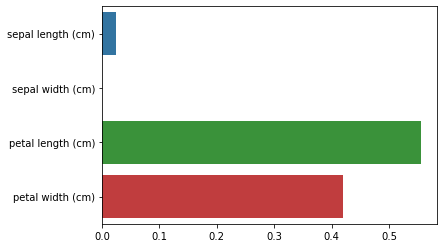

In [12]:
sns.barplot(x = dt_clf.feature_importances_, y = iris.feature_names)
plt.show()

In [13]:
import pandas as pd
df = pd.DataFrame({
    'name':iris.feature_names,
    'no constraint':dt_clf.feature_importances_,
    'max_depth=3':dt_clf2.feature_importances_,
    'min_samples_split=4':dt_clf3.feature_importances_,
    'min_samples_leaf=4':dt_clf4.feature_importances_
})
df

,name,no constraint,max_depth=3,min_samples_split=4,min_samples_leaf=4
0,sepal length (cm),0.025005,0.000000,0.008623,0.008623
1,sepal width (cm),0.000000,0.000000,0.000000,0.000000
2,petal length (cm),0.554903,0.558107,0.556796,0.556796
3,petal width (cm),0.420092,0.441893,0.434581,0.434581


## 과적합

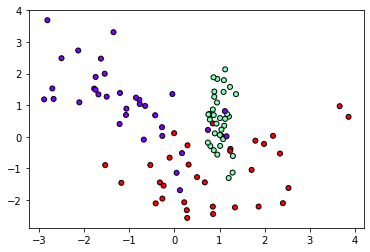

In [14]:
from sklearn.datasets import make_classification

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    n_classes=3, n_clusters_per_class=1, random_state=0
)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색으로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, cmap='rainbow',
edgecolor='k')
plt.show()